---
title: "A Tale of Two Worlds: Child Well-being Across Economic and Healthcare Landscapes"
author: "Pranitha Bangera"
format:
  html:
    embed-resources: true
    code-fold: true
    theme: cosmo
    toc: true
    toc-depth: 2
---

## **Introduction:**

The promise of a healthy and prosperous childhood remains tragically unevenly distributed across our interconnected world. This report delves into the intricate threads that weave the tapestry of child well-being, specifically examining the profound influence of healthcare access and economic disparities. Leveraging the wealth of data provided by UNICEF, a cornerstone of global efforts to safeguard childhood, we embark on an analytical journey to illuminate the relationships between critical development indicators and the persistent regional inequalities that shape young lives.

Our investigation centers on a fundamental yet often overlooked aspect of healthcare: the availability of basic hygiene services within healthcare facilities. As a primary line of defense against infection and a cornerstone of quality care, the presence or absence of these services serves as a powerful indicator of healthcare infrastructure strength and a crucial determinant of child health outcomes. By mapping the global landscape of this essential resource, we aim to expose the stark realities of access and identify the nations facing the most significant challenges.

Furthermore, we explore the potential links between a nation's economic standing, as measured by GDP per capita, and its ability to provide adequate healthcare hygiene. Understanding whether economic prosperity translates directly into better healthcare standards for children is vital for informing effective development strategies.

Finally, recognizing that progress is not static, we analyze the trends in healthcare hygiene over time within the world's most populous countries. This longitudinal perspective allows us to discern patterns of improvement, stagnation, or decline, offering crucial insights into the long-term commitment and effectiveness of efforts to enhance child well-being.

Through a series of visualizations and analyses, this report seeks to paint a comprehensive picture of the interconnected challenges and opportunities in ensuring a healthier and more equitable future for children across the globe. By highlighting disparities and exploring potential drivers, we aim to contribute to a deeper understanding of the factors that shape child well-being and inform targeted interventions for a more just and healthy world for all children.



In [ ]:
!pip install plotnine
!pip install quarto
!pip install quarto-cli;


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

# Load the datasets
indicator_df = pd.read_csv('clean_unicef_indicator_1.csv')
metadata_df = pd.read_csv('clean_unicef_metadata.csv')



# **Worl Map Visualtion :**
This world map visually narrates the global landscape of hygiene standards within healthcare facilities for the year 2023. By integrating data on the 'Proportion of health care facilities with no hygiene service' with a global map, the visualization paints a clear picture of disparities across nations. Countries are shaded using a color gradient, where darker hues (towards blue) may indicate a higher proportion of facilities lacking hygiene services, and lighter hues (towards yellow/green) suggest better access to these essential resources. Countries with missing data are clearly marked with a light grey color and red diagonal lines, emphasizing the gaps in our understanding. This geographical representation allows for a quick and intuitive grasp of the global challenges and successes in ensuring basic hygiene within healthcare, a critical factor for patient safety and public health.

<ipython-input-22-c5f3750fc3e5>:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
<ipython-input-22-c5f3750fc3e5>:55: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
<ipython-input-22-c5f3750fc3e5>:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


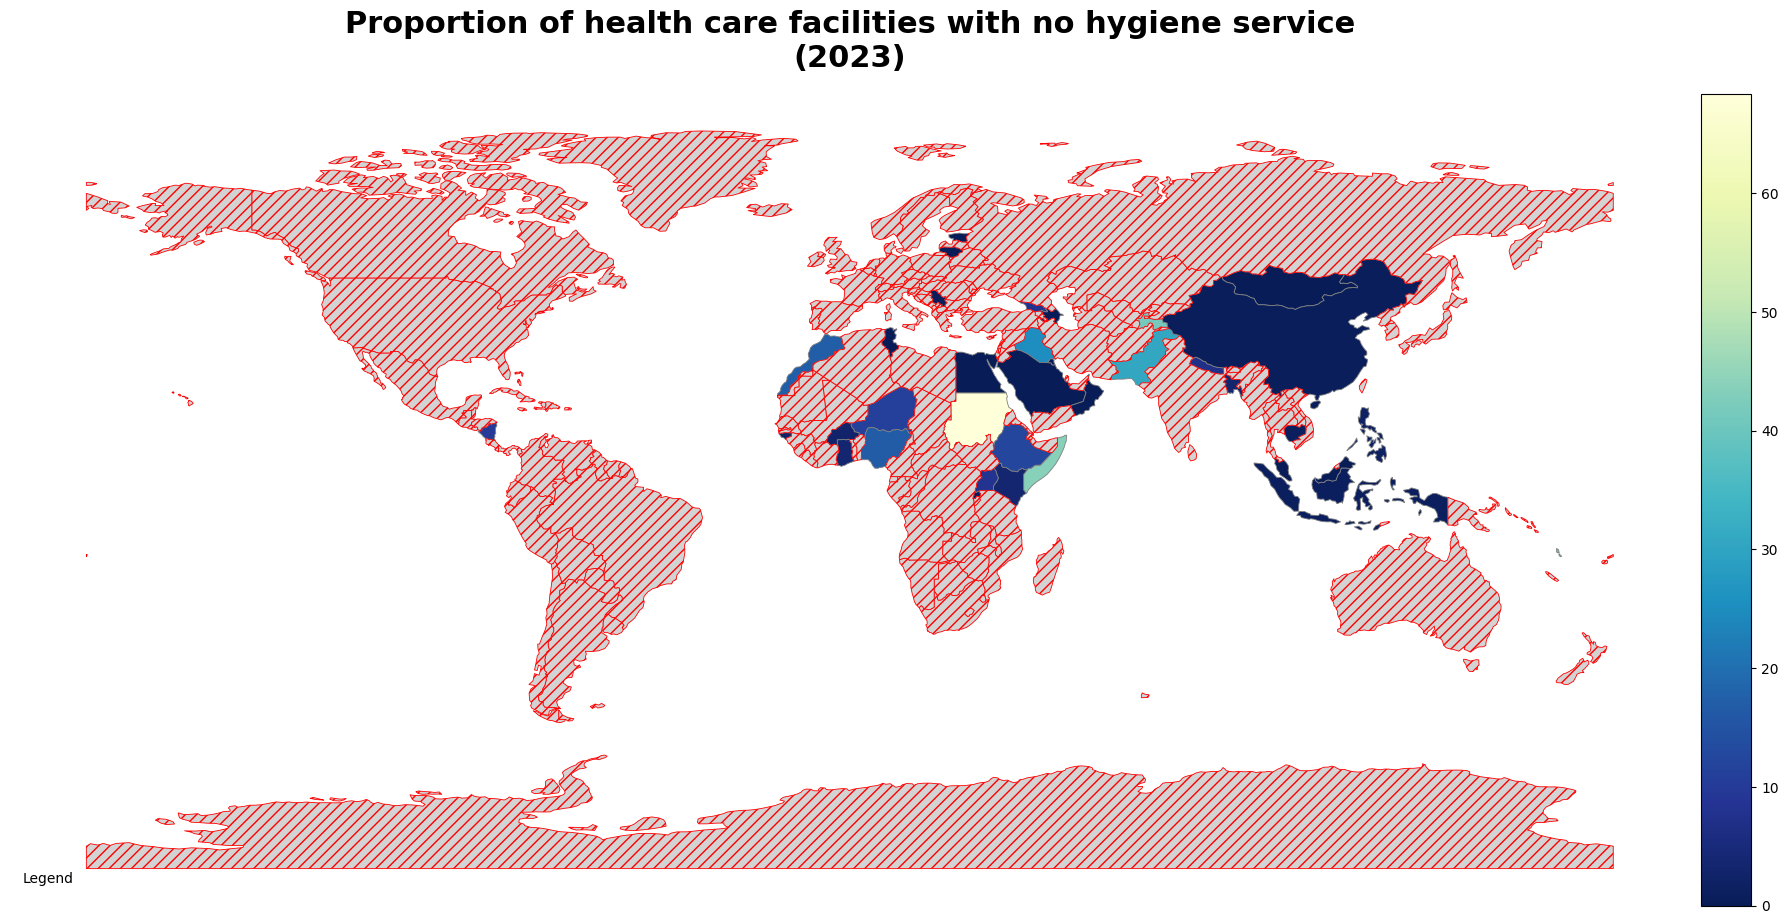

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the datasets
indicator_df = pd.read_csv('clean_unicef_indicator_1.csv')

# --- 1. Choose the specific indicator ---
selected_indicator = 'Proportion of health care facilities with no hygiene service'

# --- 2. Filter data for the chosen indicator and year 2023 ---
indicator_2023 = indicator_df[(indicator_df['indicator'] == selected_indicator) & (indicator_df['time_period'] == 2023)].copy()

if indicator_2023.empty:
    latest_year = indicator_df['time_period'].max()
    indicator_2023 = indicator_df[(indicator_df['indicator'] == selected_indicator) & (indicator_df['time_period'] == latest_year)].copy()
    year_to_display = latest_year
    print(f"Warning: Data for 2023 not found. Using {latest_year}")
else:
    year_to_display = 2023

# --- 3. Load world map (using a URL shapefile) ---
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# --- 4. Merge the indicator data with world map data ---
merged = world.merge(indicator_2023, how='left', left_on='NAME', right_on='country')

# --- 5. Plot the choropleth map ---
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

# Draw the map
plot = merged.plot(column='obs_value',
                   cmap='YlGnBu_r',  # Prettier color palette
                   linewidth=0.6,
                   ax=ax,
                   edgecolor='gray',
                   legend=True,
                   cax=cax,
                   missing_kwds={
                       "color": "lightgrey",
                       "edgecolor": "red",
                       "hatch": "///",
                       "label": "No data available"
                   })

# --- 6. Customize the plot ---
ax.set_title(f'{selected_indicator}\n({year_to_display})', fontsize=22, fontweight='bold', loc='center', pad=20)
ax.axis('off')

# Add a custom legend for "No data"
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='lower left', fontsize=10, frameon=False, title='Legend')

# --- 7. Display the map ---
plt.tight_layout()
plt.show()


# **Bar Chart of Indicator by Country:**
This bar chart spotlights the 20 countries exhibiting the highest proportion of healthcare facilities lacking basic hygiene services as per the latest year. By focusing on the nations facing the most significant challenges in this critical aspect of healthcare infrastructure, the visualization underscores the urgent need for intervention in these regions. The height of each bar directly corresponds to the percentage of healthcare facilities without hygiene services, allowing for a clear comparison of the severity of the issue across these top-ranking countries. The countries are ordered from highest to lowest proportion, immediately drawing attention to those with the most pressing needs.

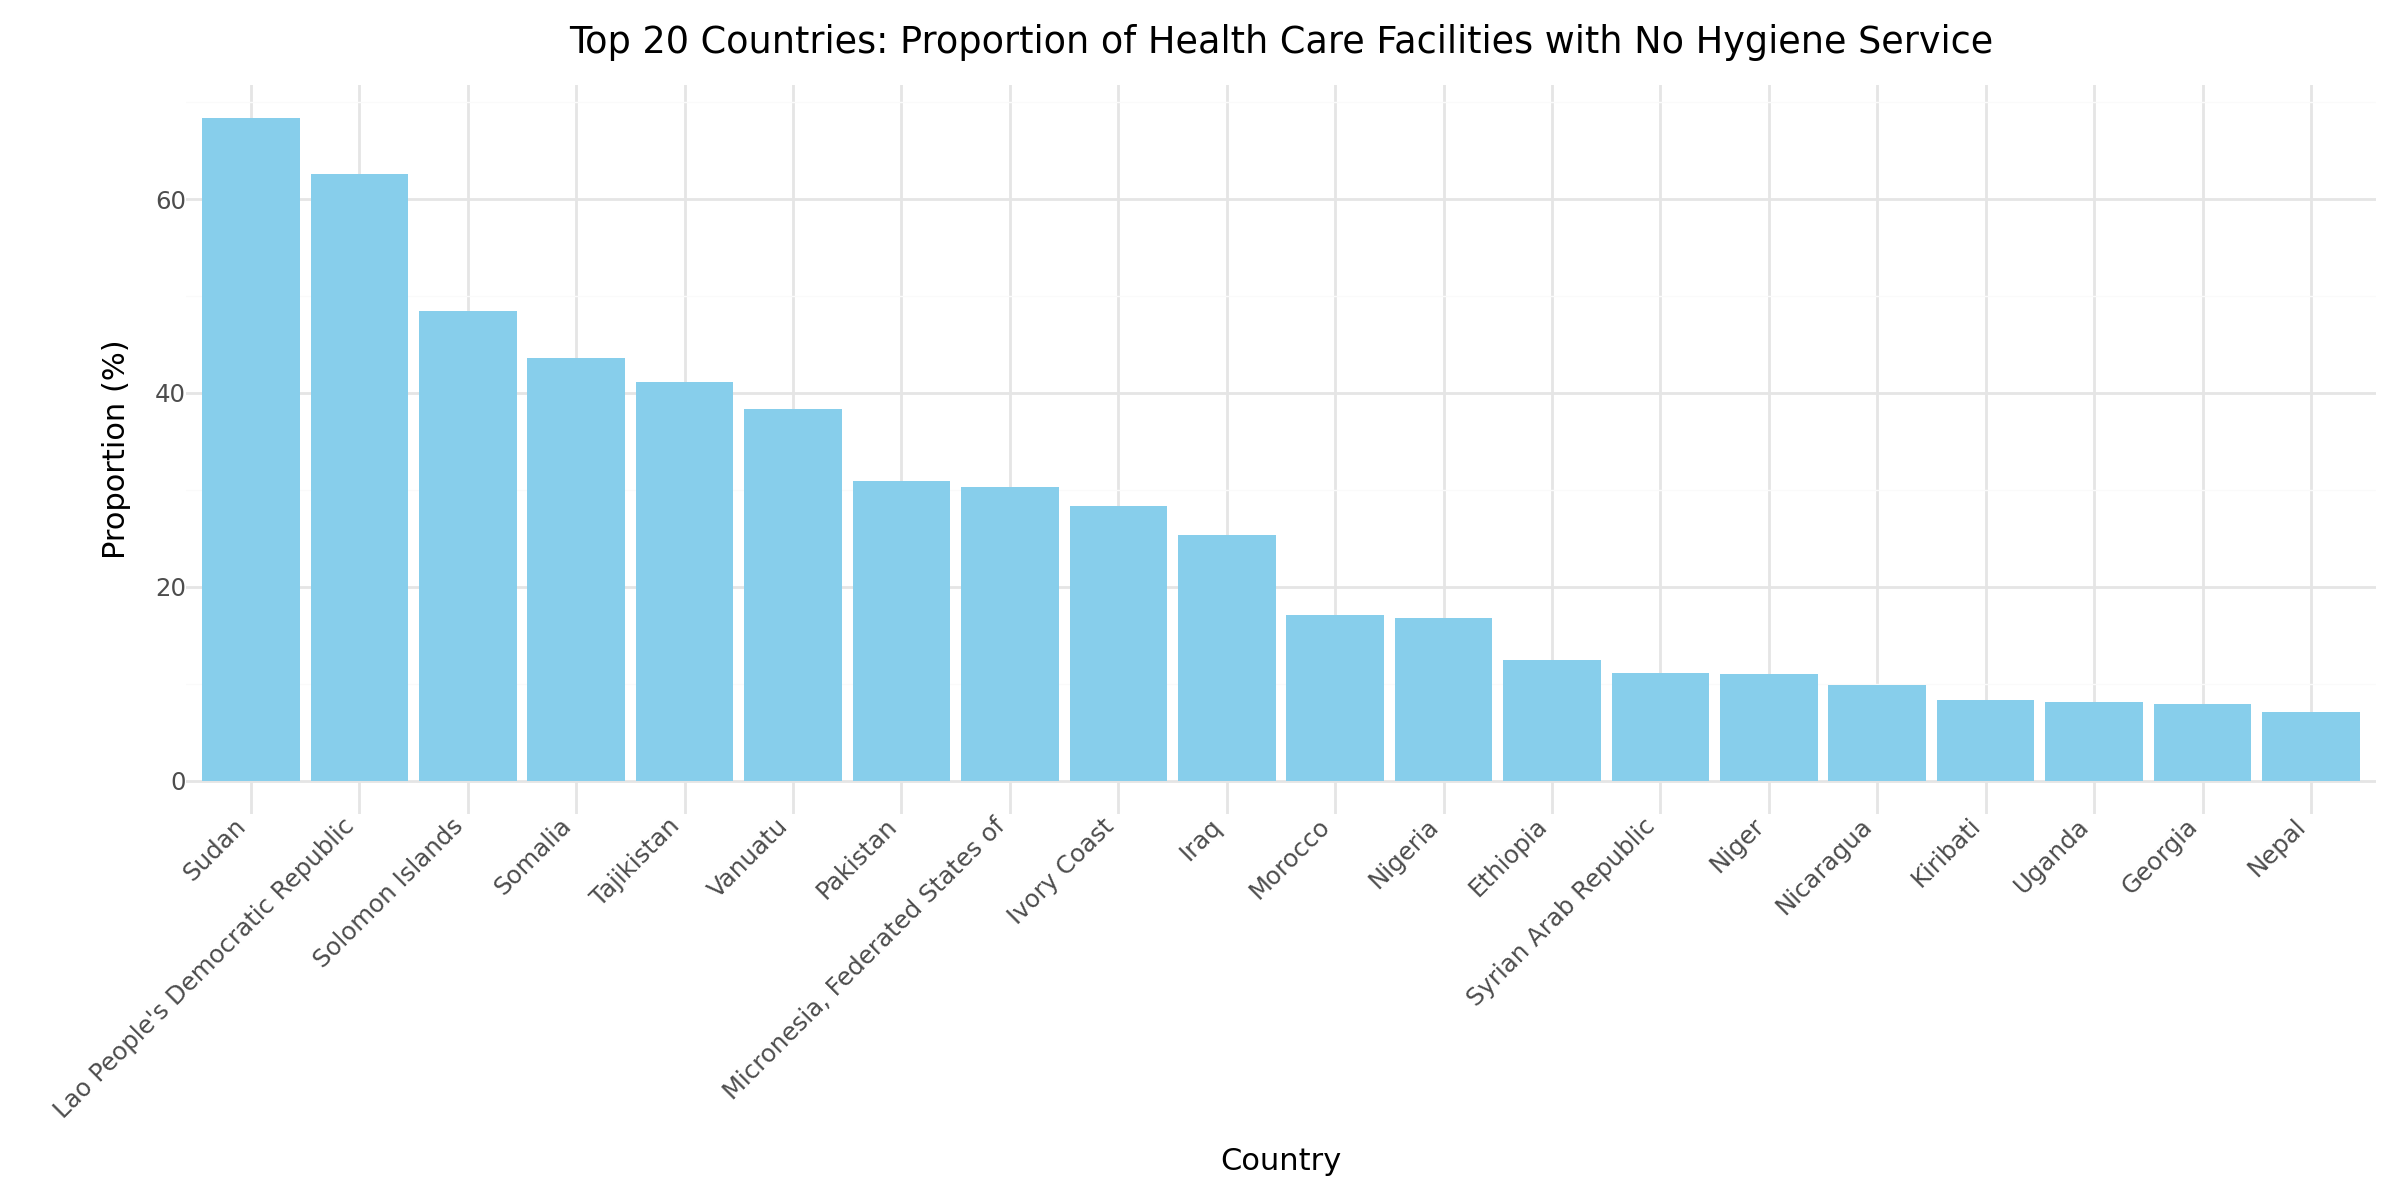

In [ ]:
from plotnine import *
import pandas as pd

# Load the data
indicator_df = pd.read_csv('clean_unicef_indicator_1.csv')

# --- 1. Filter only the indicator you want and year 2023 ---
selected_indicator = 'Proportion of health care facilities with no hygiene service'
indicator_2023 = indicator_df[(indicator_df['indicator'] == selected_indicator) & (indicator_df['time_period'] == 2023)].copy()

# If 2023 data is missing, fallback to latest available year
if indicator_2023.empty:
    latest_year = indicator_df['time_period'].max()
    indicator_2023 = indicator_df[(indicator_df['indicator'] == selected_indicator) & (indicator_df['time_period'] == latest_year)].copy()

# --- 2. Sort and take Top 20 countries by obs_value ---
top20 = indicator_2023.sort_values('obs_value', ascending=False).head(20)

# --- 3. Create the bar plot ---
bar_plot = (
    ggplot(top20, aes(x='reorder(country, -obs_value)', y='obs_value')) +
    geom_bar(stat='identity', fill='skyblue') +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, hjust=1),
        figure_size=(12, 6)
    ) +
    labs(
        title='Top 20 Countries: Proportion of Health Care Facilities with No Hygiene Service',
        x='Country',
        y='Proportion (%)'
    )
)

bar_plot


# **Top 20 most popluated countires**
This bar chart unveils the demographic giants of our world, showcasing the top 20 most populous countries in the year 2023. By filtering global population data for this specific year, the visualization provides a snapshot of the current human distribution across nations. Each bar represents a country, its length directly proportional to its total population. Ranked from the most to the least populous within this select group, the chart immediately highlights the scale of human concentration in these leading nations. The vibrant 'viridis' color palette adds visual appeal, while the clear labeling of countries and population figures allows for straightforward identification and comparison of these significant demographic centers.

<ipython-input-24-6b584d1437ed>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



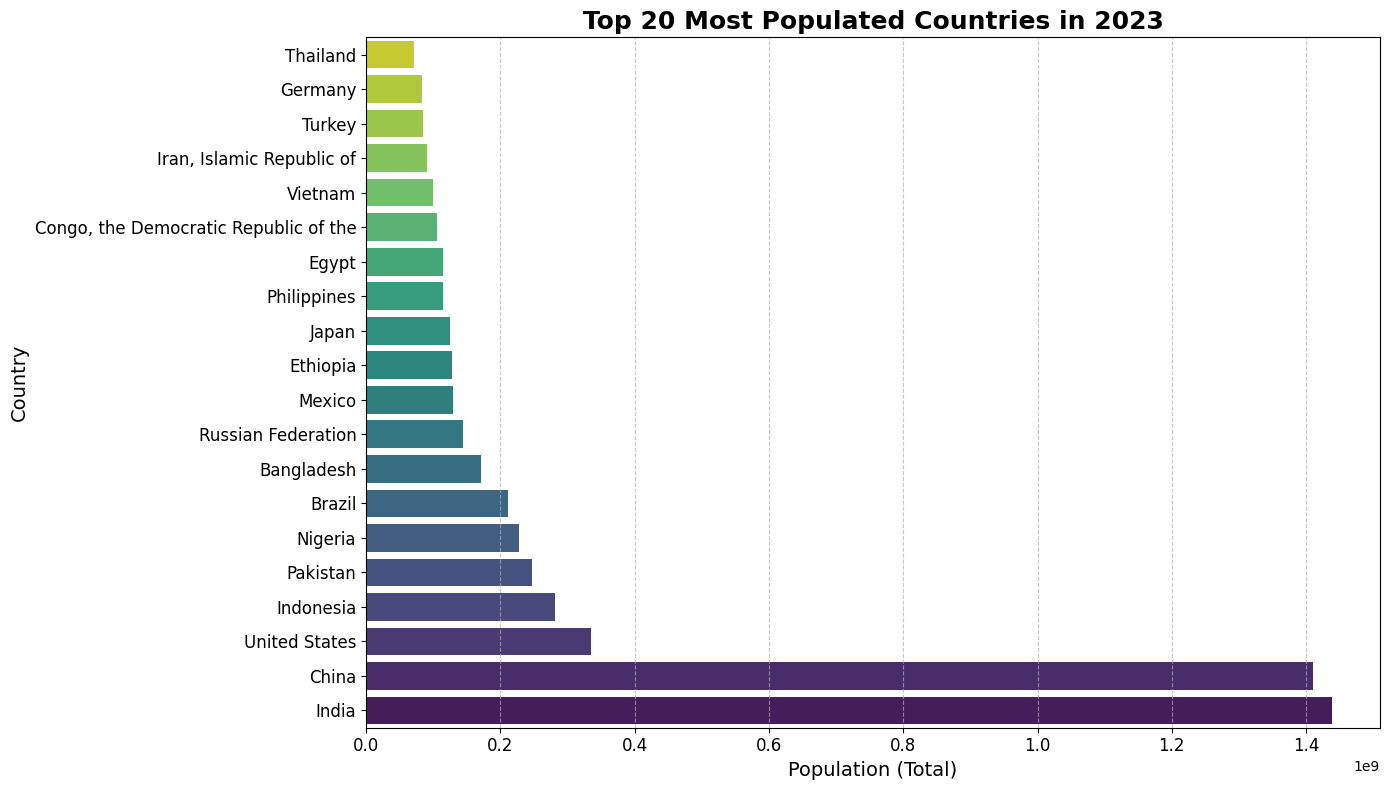

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
metadata_df = pd.read_csv('clean_unicef_metadata.csv')

# --- 1. Filter for year 2023 ---
population_2023 = metadata_df[metadata_df['year'] == 2023].copy()

# --- 2. Select needed columns ---
population_2023 = population_2023[['country', 'Population, total']]

# --- 3. Drop missing values if any ---
population_2023 = population_2023.dropna(subset=['Population, total'])

# --- 4. Get the top 20 most populated countries ---
top20_population = population_2023.sort_values(by='Population, total', ascending=False).head(20)

# --- 5. Create the bar chart ---
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top20_population,
    y='country',
    x='Population, total',
    palette='viridis'
)

# --- 6. Customize the plot ---
plt.title('Top 20 Most Populated Countries in 2023', fontsize=18, fontweight='bold')
plt.xlabel('Population (Total)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Largest country on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# --- 7. Show the chart ---
plt.tight_layout()
plt.show()


# **Indicator Trend Over Time (Scatterplot with Regression Line)**

This scatter plot explores the potential connection between economic prosperity, as measured by GDP per capita, and the state of hygiene in healthcare facilities across the ten countries with the highest proportion of facilities lacking basic hygiene services in the latest available year. Each point on the graph represents a data observation for a specific year within one of these ten nations. By color-coding each country, we can visually compare their individual trends and positions in the relationship between national wealth and this crucial aspect of healthcare infrastructure. The plot aims to reveal whether there is a discernible pattern – for instance, if countries with higher GDP per capita tend to have a lower proportion of healthcare facilities without hygiene services, or if other factors might be at play in these nations facing significant hygiene challenges.

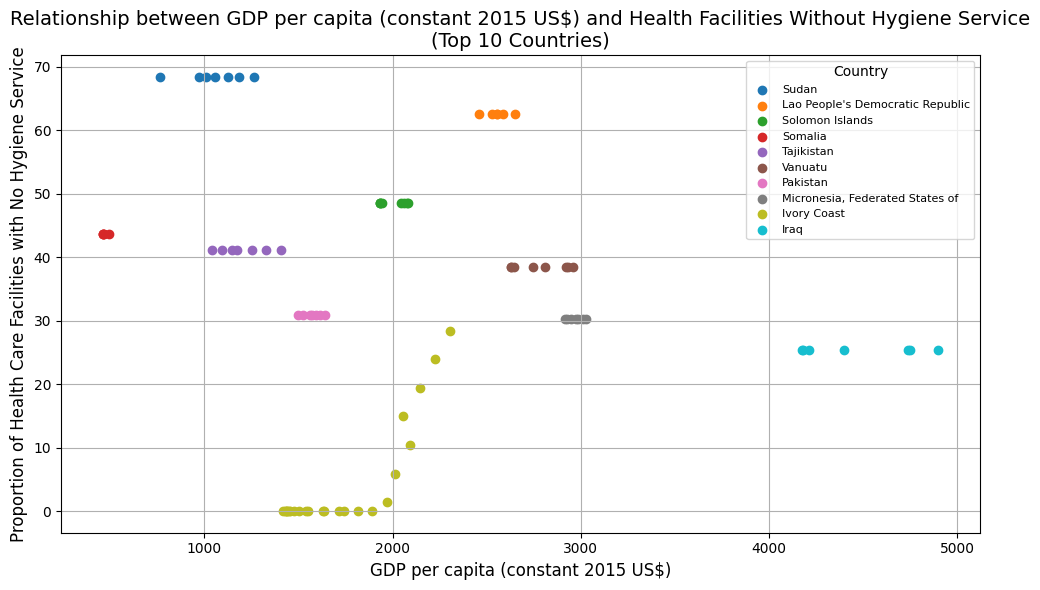

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
indicator_df = pd.read_csv('clean_unicef_indicator_1.csv')
metadata_df = pd.read_csv('clean_unicef_metadata.csv')

# --- 1. Choose the indicator and metadata variable ---
selected_indicator = 'Proportion of health care facilities with no hygiene service'
metadata_variable = 'GDP per capita (constant 2015 US$)'

# --- 2. Filter indicator data ---
indicator_data = indicator_df[indicator_df['indicator'] == selected_indicator].copy()
indicator_data = indicator_data[['country', 'time_period', 'obs_value']].rename(columns={'obs_value': 'indicator_value', 'time_period': 'year'})
indicator_data['year'] = indicator_data['year'].astype(int)

# --- 3. Select metadata variable ---
metadata_scatter = metadata_df[['country', 'year', metadata_variable]].copy()
metadata_scatter['year'] = metadata_scatter['year'].astype(int)

# --- 4. Merge the two dataframes ---
merged_scatter_data = pd.merge(indicator_data, metadata_scatter, on=['country', 'year'], how='inner')
merged_scatter_data_cleaned = merged_scatter_data.dropna(subset=['indicator_value', metadata_variable])

# --- 5. Determine the top 10 countries based on the latest indicator value ---
latest_year = merged_scatter_data_cleaned['year'].max()
latest_data = merged_scatter_data_cleaned[merged_scatter_data_cleaned['year'] == latest_year].sort_values(by='indicator_value', ascending=False).head(10)
top_10_countries = latest_data['country'].tolist()

# --- 6. Filter the merged data for the top 10 countries ---
top_10_data = merged_scatter_data_cleaned[merged_scatter_data_cleaned['country'].isin(top_10_countries)]

# --- 7. Create the Matplotlib scatter plot ---
plt.figure(figsize=(10, 6))
for country in top_10_countries:
    country_data = top_10_data[top_10_data['country'] == country]
    plt.scatter(country_data[metadata_variable], country_data['indicator_value'], label=country)

plt.title(f'Relationship between {metadata_variable} and Health Facilities Without Hygiene Service\n(Top 10 Countries)', fontsize=14)
plt.xlabel(metadata_variable, fontsize=12)
plt.ylabel('Proportion of Health Care Facilities with No Hygiene Service', fontsize=12)
plt.legend(title='Country', fontsize=8)
plt.grid(True)
plt.tight_layout()

# --- 8. Display the plot ---
plt.show()


# **Time-Series Analysis of Indicator Trends Across Countries**

This time-series chart illustrates the trends in the proportion of healthcare facilities lacking basic hygiene services across the world's 20 most populous countries over time. Each colored line represents a specific nation, tracing the changes in this critical health indicator across different years. By focusing on these demographic giants, the visualization allows us to observe how the availability of essential hygiene infrastructure in healthcare settings has evolved in countries with the largest populations. Comparing the slopes and patterns of these lines can reveal which nations have made progress, which have faced setbacks, and highlight potential disparities or common challenges in ensuring fundamental hygiene standards within their healthcare systems.

In [ ]:
pip install pandas plotly

<ggplot: (1400 x 800)>


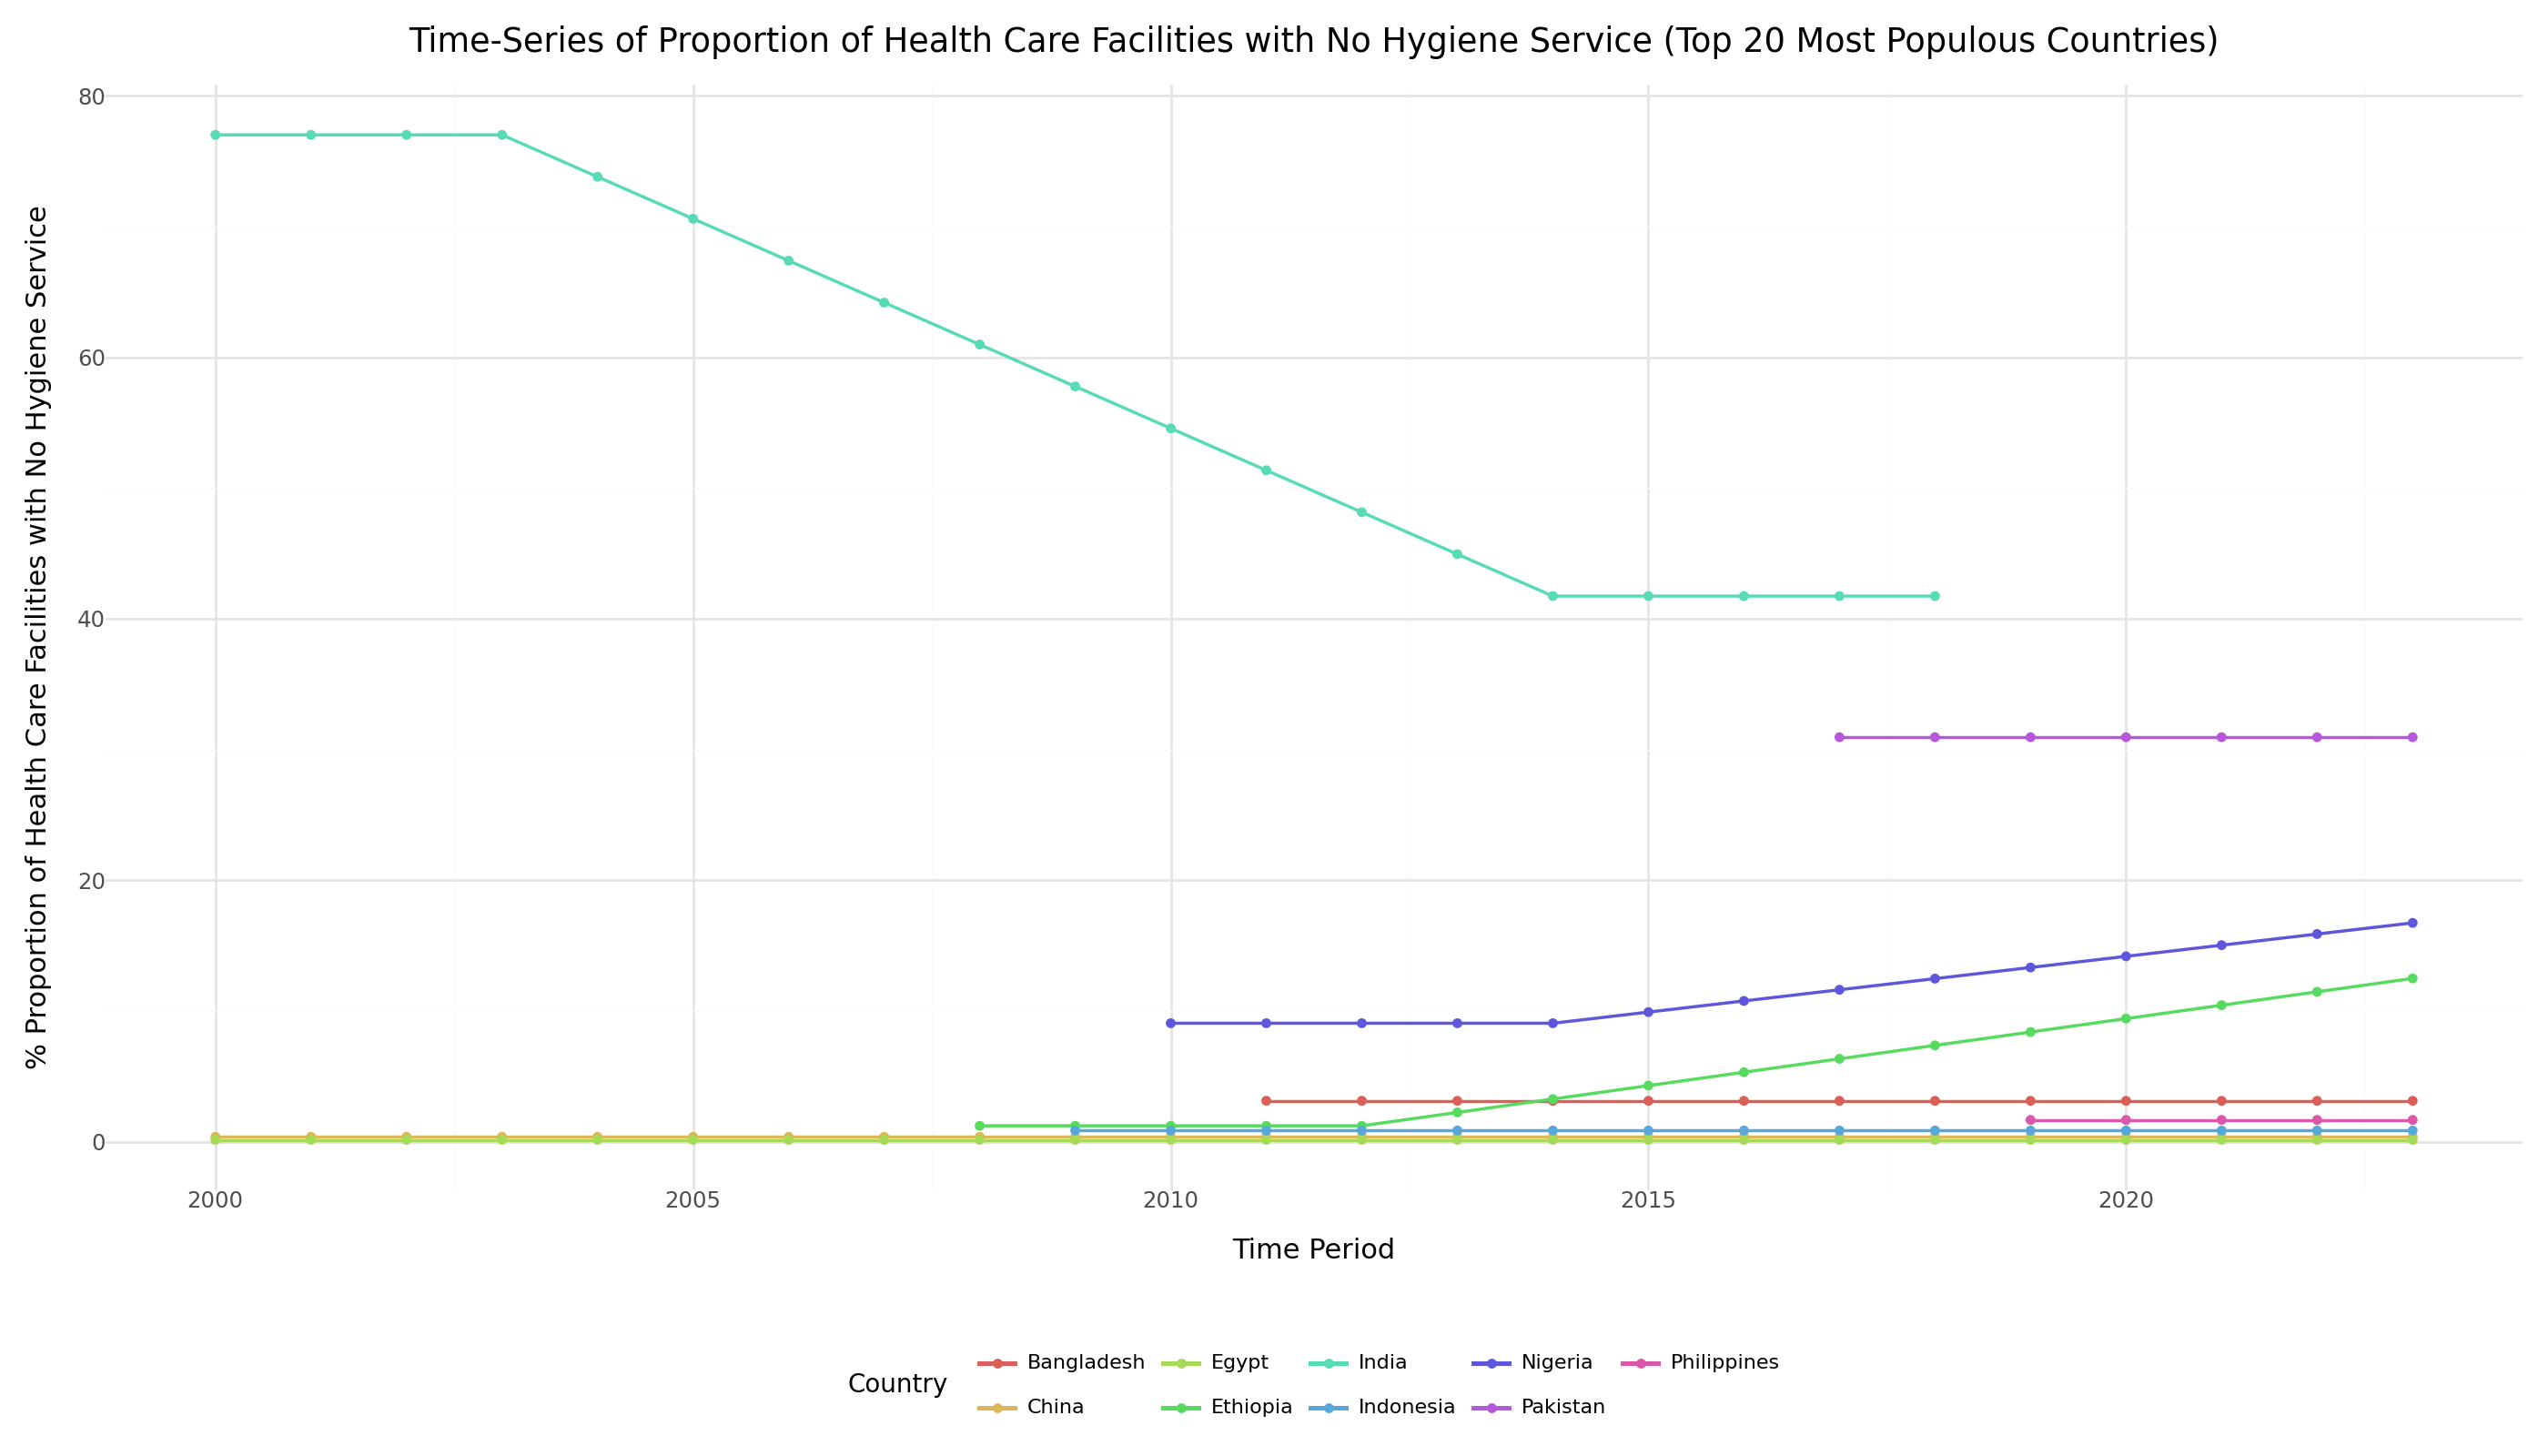

In [ ]:
from plotnine import *
import pandas as pd
from IPython.display import display

most_populous_countries = [
    'India', 'China', 'United States', 'Indonesia', 'Pakistan',
    'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico',
    'Ethiopia', 'Japan', 'Philippines', 'Egypt', 'DR Congo',
    'Vietnam', 'Iran', 'Turkey', 'Germany', 'Thailand'
]
subset_df = indicator_df[indicator_df['country'].isin(most_populous_countries)]

time_series_subset_plot = (
    ggplot(subset_df, aes(x='time_period', y='obs_value', color='country')) +
    geom_line(size=0.7) +
    geom_point(size=1.2) +
    labs(
        title='Time-Series of Proportion of Health Care Facilities with No Hygiene Service (Top 20 Most Populous Countries)',
        x='Time Period',
        y='% Proportion of Health Care Facilities with No Hygiene Service',
        color='Country'
    ) +
    theme_minimal() +
    theme(
        legend_position='bottom',
        figure_size=(14, 8),
        legend_title=element_text(size=10),
        legend_text=element_text(size=8)
    )
)

print(time_series_subset_plot)
display(time_series_subset_plot)


# **Conclusion:**

Our analysis, utilizing UNICEF data, reveals a complex interplay between healthcare infrastructure, economic factors, and demographic trends in shaping child well-being globally. The world map starkly illustrates the significant disparities in hygiene standards within healthcare facilities, highlighting regions where a substantial proportion of facilities lack basic necessities. This foundational issue, critical for preventing infection and ensuring patient safety, appears to be a persistent challenge in many parts of the world.

Focusing on the 20 countries with the highest proportion of healthcare facilities without hygiene services underscores the urgency for targeted interventions in these nations. These bar charts serve as a clear call to action, identifying the specific areas where improvements are most critically needed.

Examining the demographic landscape, the bar chart of the top 20 most populous countries provides context for understanding the scale of potential impact when healthcare challenges exist in these densely populated nations. Addressing healthcare disparities in these regions could yield significant positive outcomes for a large segment of the global population.

The scatter plot exploring the relationship between GDP per capita and healthcare hygiene suggests a nuanced connection. While economic prosperity might be expected to correlate with better healthcare infrastructure, the trends observed in the ten countries with the poorest hygiene standards indicate that economic factors alone do not guarantee adequate hygiene in healthcare settings. Other determinants, such as governance, resource allocation within the health sector, and specific national priorities, likely play crucial roles.

Finally, the time-series analysis of the 20 most populous countries reveals diverse trajectories in addressing healthcare hygiene over time. Some nations demonstrate progress, while others show stagnation or even regression. This longitudinal perspective highlights the dynamic nature of healthcare development and underscores the need for sustained efforts and targeted strategies to ensure consistent improvement in these fundamental standards across the globe's most populous regions.

In conclusion, our findings emphasize the persistent global challenge of ensuring basic hygiene in healthcare facilities, particularly in nations with large populations and those already facing significant deficits. While economic development may play a role, focused interventions and context-specific strategies are crucial to address these disparities and ultimately improve child well-being worldwide. Further research into the specific drivers of progress and stagnation within individual countries is warranted to inform more effective and targeted interventions.